In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)
pd.set_option('display.width',1000)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
df = pd.read_csv('../input/pubg-understanding-the-data/PUBG.csv?dl=0')
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,1241,0,0,0.00000,1306,squad-fpp,28,26,-1,0,0.00000,0,0.00000,0,0,244.80000,1,1466,0.44440
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47000,0,0,0,57,0,0,0,0.00000,1777,squad-fpp,26,25,1484,0,0.00450,0,11.04000,0,0,1434.00000,5,0,0.64000
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,0,0,0,0.00000,1318,duo,50,47,1491,0,0.00000,0,0.00000,0,0,161.80000,2,0,0.77550
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90000,0,0,0,75,0,0,0,0.00000,1436,squad-fpp,31,30,1408,0,0.00000,0,0.00000,0,0,202.70000,3,0,0.16670
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,0,1,1,58.53000,1424,solo-fpp,97,95,1560,0,0.00000,0,0.00000,0,0,49.75000,2,0,0.18750


<AxesSubplot:>

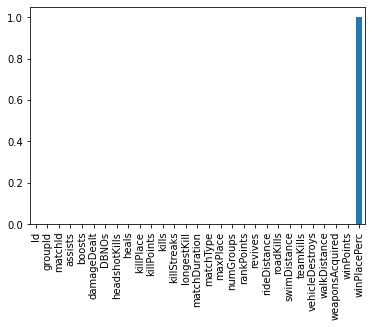

In [3]:
null = df.isnull().sum()
null.plot(kind = 'bar')

In [4]:
df.dropna(inplace= True)

## Kills Related 

In [5]:
print(f"The average kills is {np.round(df['kills'].mean(),2)}. 99% of the players made {df['kills'].quantile(0.99)} kills and the maximum kills is {df['kills'].max()}")

The average kills is 0.92. 99% of the players made 7.0 kills and the maximum kills is 72


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


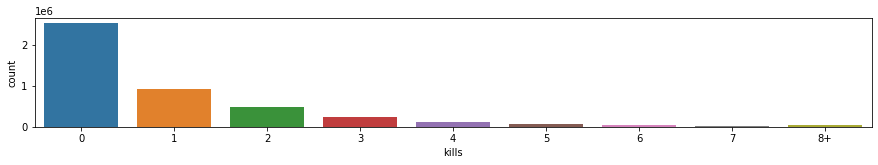

In [6]:
#Kill count
df_cp = df.copy(deep= True)
df_cp.loc[df_cp['kills']>df['kills'].quantile(0.99)]='8+'
plt.figure(figsize = (15,2))
sns.countplot(df_cp['kills'].astype('str').sort_values())
plt.show()

**0 kills is more prone for occurance in comparison to other**

In [7]:
#Relationship between walking distance and kills
print(f"The average wd is {np.round(df['walkDistance'].mean(),2)}. 99% of the players walked {df['walkDistance'].quantile(0.99)} and the maximum wd is {df['walkDistance'].max()}")

The average wd is 1154.22. 99% of the players walked 4396.0 and the maximum wd is 25780.0


**Grouping players based on their number of kills**

In [8]:
kills = df.copy(deep=True)
kills['kills_cats'] = pd.cut(x = kills['kills'],bins= [-1,0,4,8,13,20,50,150],labels=['No kills','1-4 kills',
                                                                              '5-8 kills','9-13 kills','14-20 kills',
                                                                              '20-50 kills','50+ kills'])
kills.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,kills_cats
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,1241,0,0,0.00000,1306,squad-fpp,28,26,-1,0,0.00000,0,0.00000,0,0,244.80000,1,1466,0.44440,No kills
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47000,0,0,0,57,0,0,0,0.00000,1777,squad-fpp,26,25,1484,0,0.00450,0,11.04000,0,0,1434.00000,5,0,0.64000,No kills
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,0,0,0,0.00000,1318,duo,50,47,1491,0,0.00000,0,0.00000,0,0,161.80000,2,0,0.77550,No kills
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90000,0,0,0,75,0,0,0,0.00000,1436,squad-fpp,31,30,1408,0,0.00000,0,0.00000,0,0,202.70000,3,0,0.16670,No kills
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,0,1,1,58.53000,1424,solo-fpp,97,95,1560,0,0.00000,0,0.00000,0,0,49.75000,2,0,0.18750,1-4 kills
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.00000,1,1,0,44,0,1,1,18.44000,1395,squad-fpp,28,28,1418,0,0.00000,0,0.00000,0,0,34.70000,1,0,0.03700,1-4 kills
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.00000,0,0,0,96,1262,0,0,0.00000,1316,squad-fpp,28,28,-1,0,0.00000,0,0.00000,0,0,13.50000,1,1497,0.00000,No kills
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.53800,0,0,0,48,1000,0,0,0.00000,1967,solo-fpp,96,92,-1,0,2004.00000,0,0.00000,0,0,1089.00000,6,1500,0.73680,No kills
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.60000,0,0,0,64,0,0,0,0.00000,1375,squad,28,27,1493,0,0.00000,0,0.00000,0,0,799.90000,4,0,0.37040,No kills
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.27000,0,0,0,74,0,0,0,0.00000,1930,squad,29,27,1349,0,0.00000,0,0.00000,0,0,65.67000,1,0,0.21430,No kills


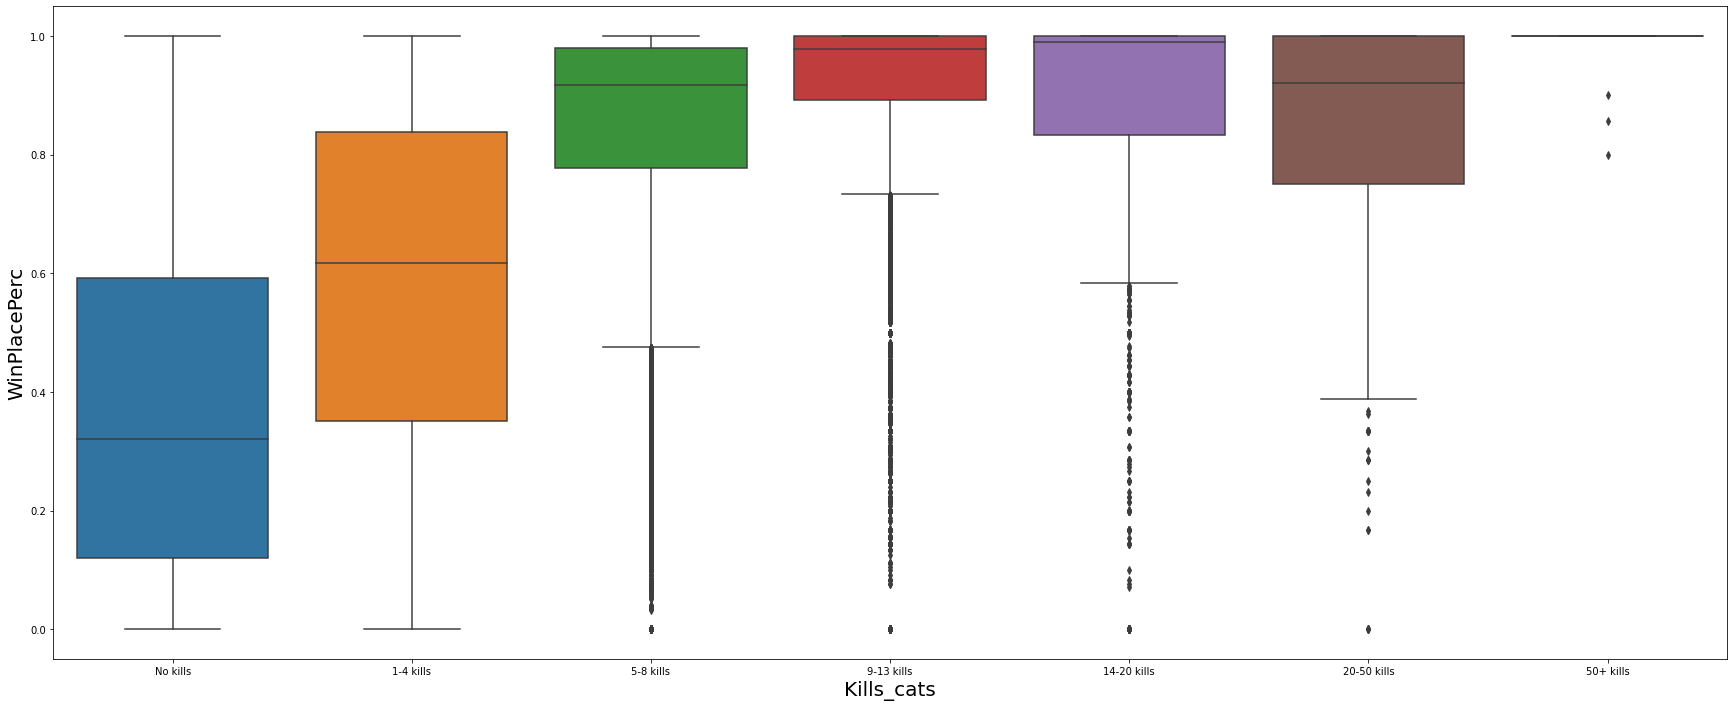

In [9]:
plt.figure(figsize = (30,12))
sns.boxplot(x = kills['kills_cats'], y = kills['winPlacePerc'])
plt.xlabel('Kills_cats',fontsize = 20)
plt.ylabel('WinPlacePerc',fontsize = 20)
plt.show()

**Higher the Number of kills, higher the winning chance**

## Winning Place Per Relationship with Different Features

In [10]:
print(f"The average walk dist is {np.round(df['walkDistance'].mean(),2)}. 85% of the players walked {df['walkDistance'].quantile(0.99)} dist or less and the maximum walking dist is {df['walkDistance'].max()}")

The average walk dist is 1154.22. 85% of the players walked 4396.0 dist or less and the maximum walking dist is 25780.0


<Figure size 1440x1080 with 0 Axes>

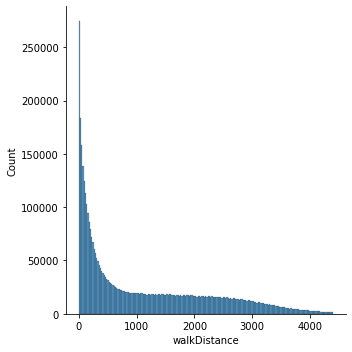

In [11]:
plt.figure(figsize = (20,15))
sns.displot(data = (kills[kills['walkDistance']<df['walkDistance'].quantile(0.99)]['walkDistance']))
plt.show()

<Figure size 1440x1080 with 0 Axes>

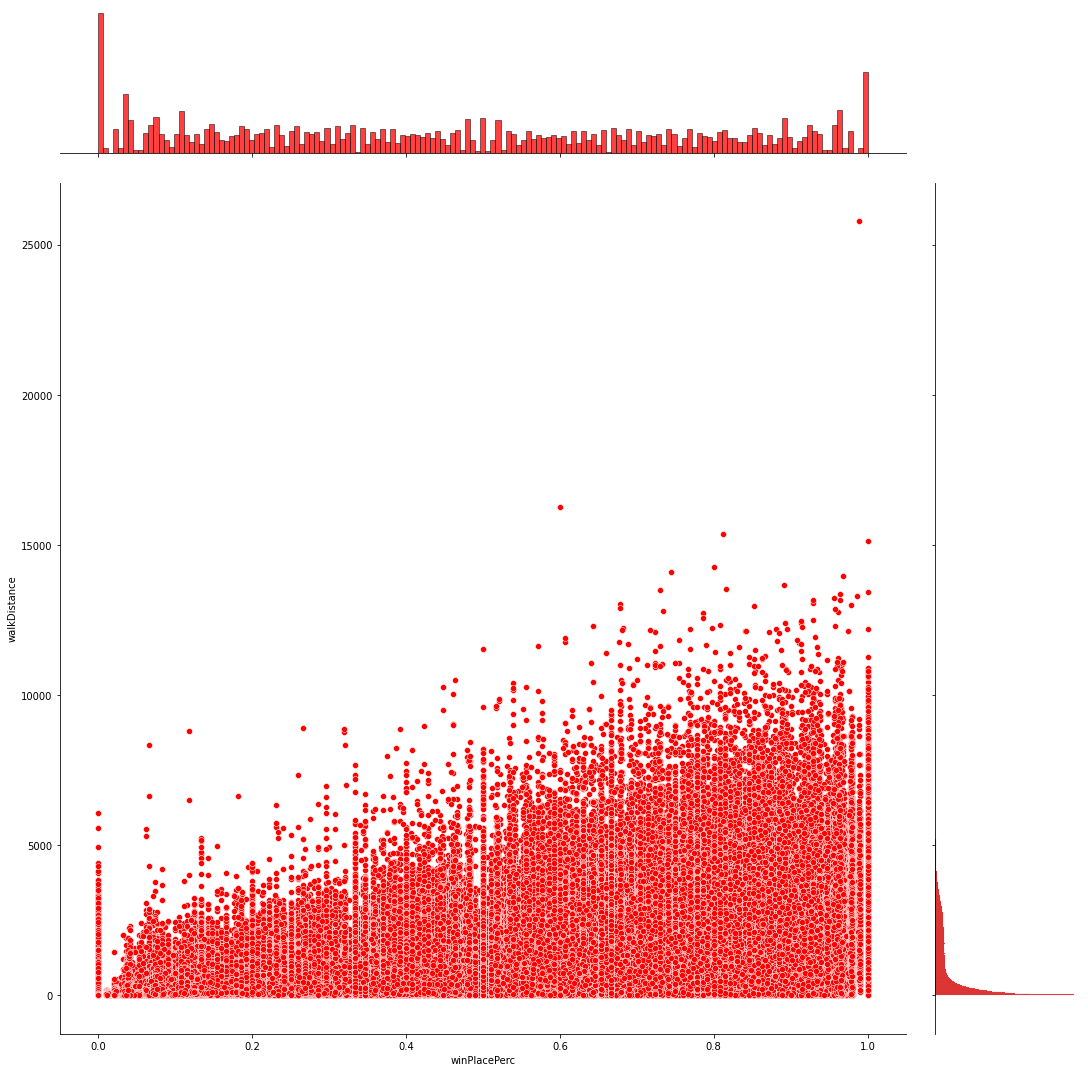

In [12]:
plt.figure(figsize = (20,15))
sns.jointplot(x= df['winPlacePerc'],y = df['walkDistance'],color = 'red',height = 15)
plt.show()

**Walk Distance is highly correlated with chance of winning**

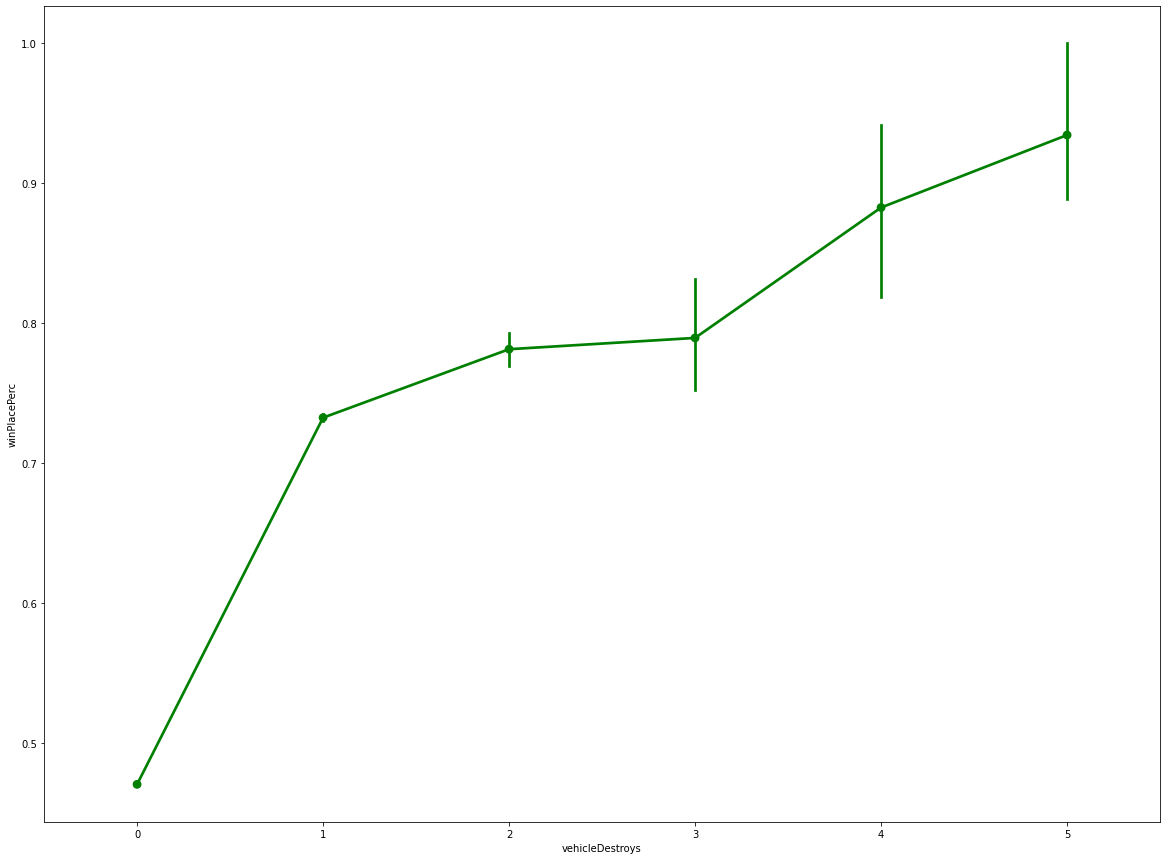

In [13]:
#Relationship between vehicleDestroys and winnings
plt.figure(figsize = (20,15))
sns.pointplot(x = df['vehicleDestroys'],y = df['winPlacePerc'],color = 'green',alpha = 0.8)
plt.show()

**Even a single vehicle destroy increases the chance of winning**

<AxesSubplot:xlabel='assists', ylabel='headshotKills'>

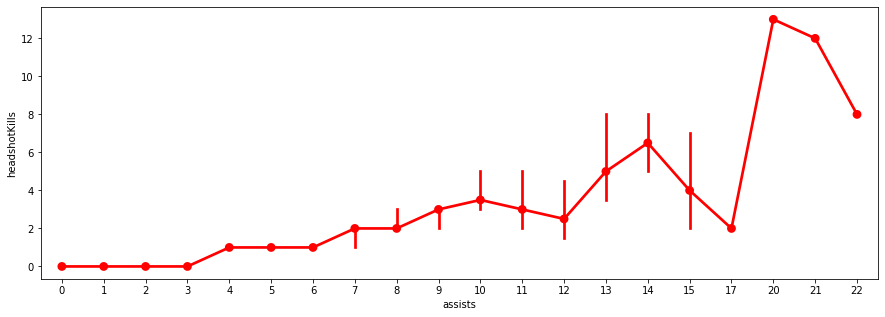

In [14]:
#Relationship between assist and headshot
plt.figure(figsize = (15,5))
sns.pointplot(x = df['assists'], y = df['headshotKills'],alpha = 0.60,color='red',estimator=np.median)

**There is an increasing trend in headshot kinds from assist = 0 till assist = 11. After that it is fluctuating. To know more, lets see assist and winning perc relationship**

<AxesSubplot:xlabel='assists', ylabel='winPlacePerc'>

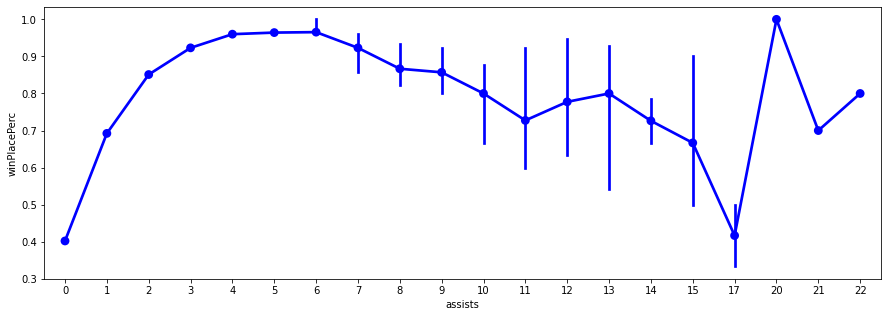

In [15]:
plt.figure(figsize = (15,5))
sns.pointplot(x = df['assists'], y =df['winPlacePerc'],color = 'blue',alpha = 0.80,estimator=np.median)

**Assist = 6, stable chance of winning and confidence interval also lies on the positive side
and 17-20 assists have highest chance of winning**

In [16]:
#Heal and Boost Use based on match duration
print(f"The average match_dur: {np.round(np.mean(df['matchDuration']),2)}. 80% players match_dur {df['matchDuration'].quantile(0.80)} or less. Max Match Duration is {df['matchDuration'].max()}. Min Match Duration is {df['matchDuration'].min()}. ")

The average match_dur: 1579.51. 80% players match_dur 1874.0 or less. Max Match Duration is 2237. Min Match Duration is 133. 


In [17]:
palette = {
    'zero': 'tab:blue',
    '1-1000': 'tab:green',
    '1001-2000': 'tab:orange',
    '2000+': 'tab:red'}

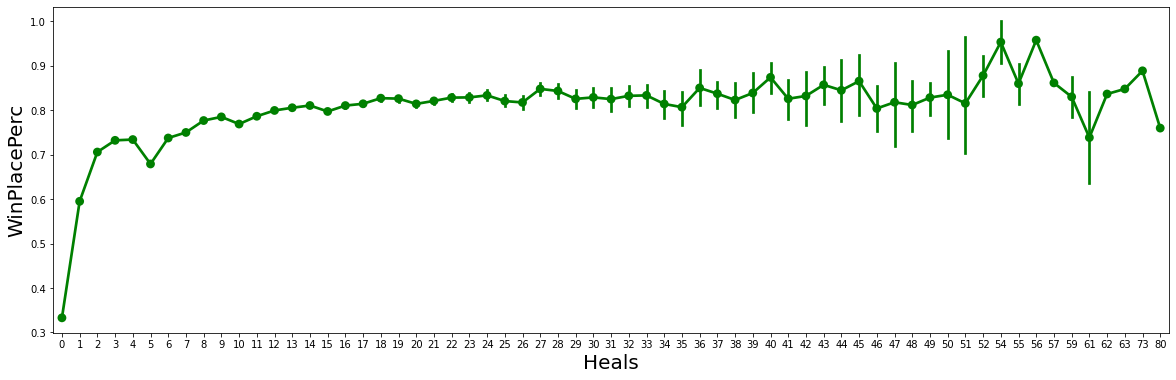

In [18]:
plt.figure(figsize = (20,6))
sns.pointplot(x = kills['heals'], y = kills['winPlacePerc'],color= 'green',alpha = 0.8)
#sns.pointplot(x = kills['boosts'], y = kills['winPlacePerc'],color = 'red',alpha = 0.8,hue = kills['match_dur_cat'])
plt.ylabel('WinPlacePerc',fontsize = 20)
plt.xlabel('Heals',fontsize = 20)
plt.show()

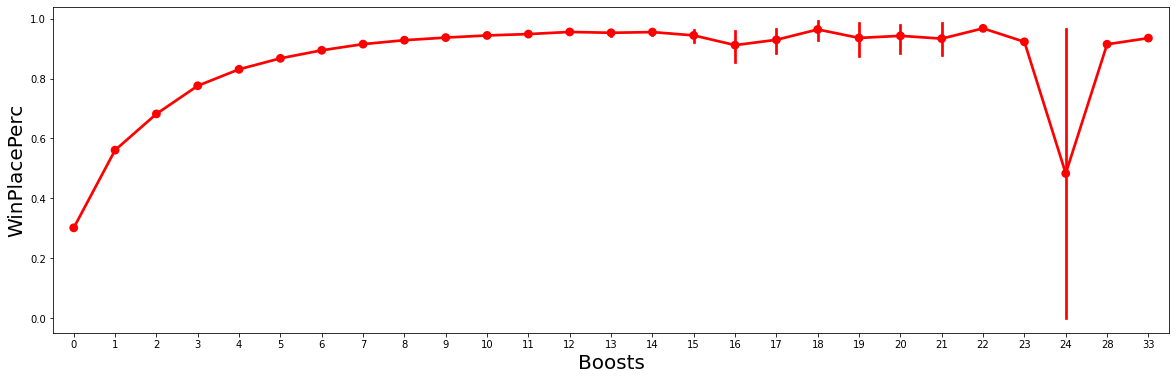

In [19]:
plt.figure(figsize = (20,6))
#sns.pointplot(x = kills['heals'], y = kills['winPlacePerc'],color= 'green',alpha = 0.8,hue=kills['match_dur_cat'])
sns.pointplot(x = kills['boosts'], y = kills['winPlacePerc'],color = 'red',alpha = 0.8)
plt.ylabel('WinPlacePerc',fontsize = 20)
plt.xlabel('Boosts',fontsize = 20)
plt.show()

## Heals/ Boosts/ Winning Perc with respect to match_duration

In [20]:
kills['match_dur_cat'] = pd.cut(x = kills['matchDuration'],bins = [-1,0,1000,2000,3000],
                               labels= ['zero','1-1000','1001-2000','2000+'])

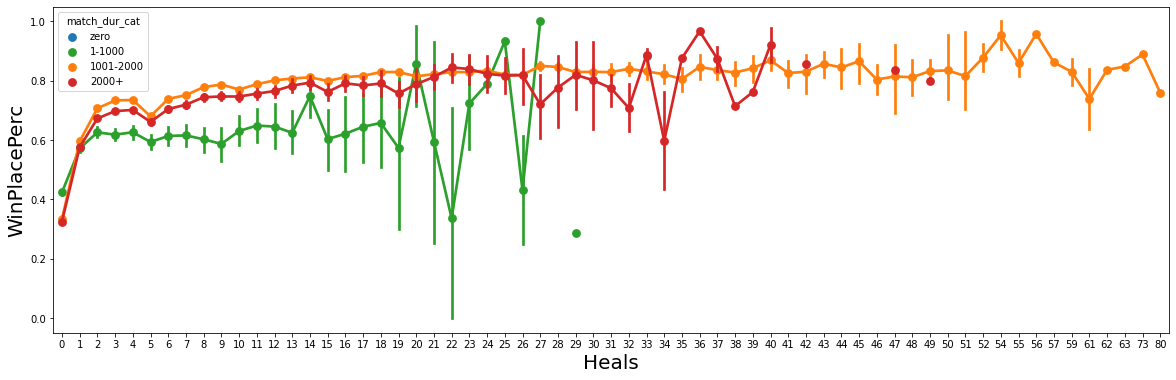

In [21]:
plt.figure(figsize = (20,6))
sns.pointplot(x = kills['heals'], y = kills['winPlacePerc'],color= 'green',alpha = 0.8,hue=kills['match_dur_cat'],palette=palette)
#sns.pointplot(x = kills['boosts'], y = kills['winPlacePerc'],color = 'red',alpha = 0.8,hue = kills['match_dur_cat'])
plt.ylabel('WinPlacePerc',fontsize = 20)
plt.xlabel('Heals',fontsize = 20)
plt.show()

**Players with match duration b/w 1001-2000 use heals the most and also have higher chance of winning and it is pretty stable in comparison to others like 2000+**

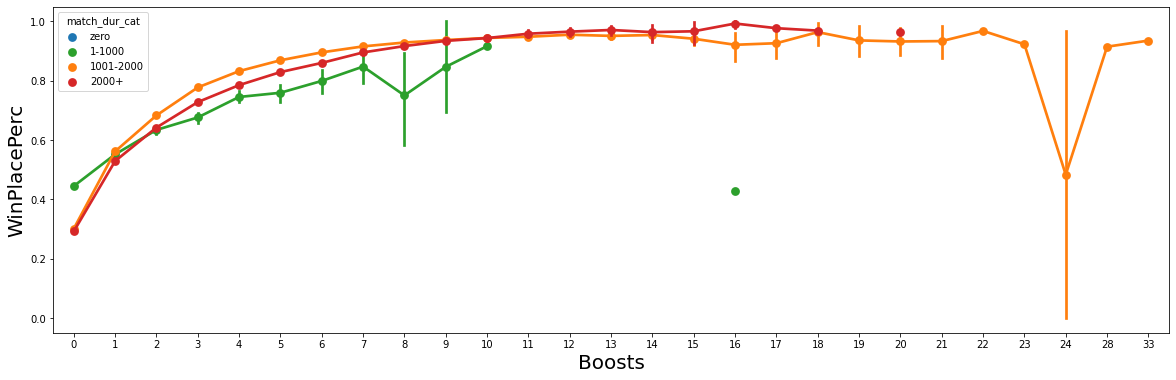

In [22]:
plt.figure(figsize = (20,6))
#sns.pointplot(x = kills['heals'], y = kills['winPlacePerc'],color= 'green',alpha = 0.8,hue=kills['match_dur_cat'])
sns.pointplot(x = kills['boosts'], y = kills['winPlacePerc'],color = 'red',alpha = 0.8,hue = kills['match_dur_cat'],palette = palette)
plt.ylabel('WinPlacePerc',fontsize = 20)
plt.xlabel('Boosts',fontsize = 20)
plt.show()

**Players playing b/w 1001-2000 match duration, use boost most often and also have higher chance of winning**

## Correlation B/w Different Columns with WinningPerc

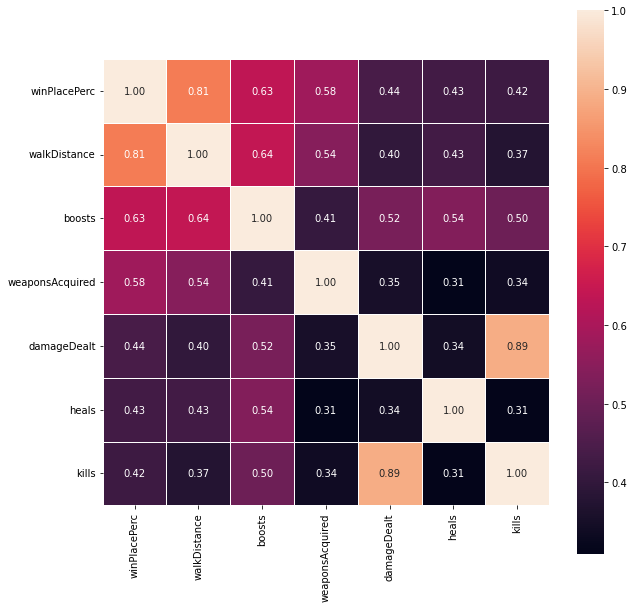

In [23]:
#Visualizing highly correlated features
cols = df.corr().nlargest(7,'winPlacePerc').index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize = (10,10))
sns.heatmap(data= cm,xticklabels=cols,yticklabels=cols,annot=True,cbar=True,fmt='.2f',linewidths=1,square=True)
plt.show()

**DamageDealt is positively correlated with kills and WinPlacePerc is highly correlated with walkDistance**